## Lab 2

### Part 3. Poetry generation

Let's try to generate some poetry using RNNs. 

You have several choices here: 

* The Shakespeare sonnets, file `sonnets.txt` available in the notebook directory.

* Роман в стихах "Евгений Онегин" Александра Сергеевича Пушкина. В предобработанном виде доступен по [ссылке](https://github.com/attatrol/data_sources/blob/master/onegin.txt).

* Some other text source, if it will be approved by the course staff.

Text generation can be designed in several steps:
    
1. Data loading.
2. Dictionary generation.
3. Data preprocessing.
4. Model (neural network) training.
5. Text generation (model evaluation).


In [1]:
import string
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Data loading: Shakespeare

Shakespeare sonnets are awailable at this [link](http://www.gutenberg.org/ebooks/1041?msg=welcome_stranger). In addition, they are stored in the same directory as this notebook (`sonnetes.txt`). Simple preprocessing is already done for you in the next cell: all technical info is dropped.

In [2]:
if not os.path.exists('sonnets.txt'):
    !wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/master/homeworks_basic/Lab2_DL/sonnets.txt

with open('sonnets.txt', 'r') as iofile:
    text = iofile.readlines()
    
TEXT_START = 45
TEXT_END = -368
text = text[TEXT_START : TEXT_END]
assert len(text) == 2616

In [3]:
text

['  From fairest creatures we desire increase,\n',
 "  That thereby beauty's rose might never die,\n",
 '  But as the riper should by time decease,\n',
 '  His tender heir might bear his memory:\n',
 '  But thou, contracted to thine own bright eyes,\n',
 "  Feed'st thy light's flame with self-substantial fuel,\n",
 '  Making a famine where abundance lies,\n',
 '  Thy self thy foe, to thy sweet self too cruel:\n',
 "  Thou that art now the world's fresh ornament,\n",
 '  And only herald to the gaudy spring,\n',
 '  Within thine own bud buriest thy content,\n',
 "  And tender churl mak'st waste in niggarding:\n",
 '    Pity the world, or else this glutton be,\n',
 "    To eat the world's due, by the grave and thee.\n",
 '\n',
 '  II\n',
 '\n',
 '  When forty winters shall besiege thy brow,\n',
 "  And dig deep trenches in thy beauty's field,\n",
 "  Thy youth's proud livery so gazed on now,\n",
 "  Will be a tatter'd weed of small worth held:\n",
 '  Then being asked, where all thy beaut

In opposite to the in-class practice, this time we want to predict complex text. Let's reduce the complexity of the task and lowercase all the symbols.

Now variable `text` is a list of strings. Join all the strings into one and lowercase it.

In [4]:
# Join all the strings into one and lowercase it
# Put result into variable text.

# Your great code here
text = ''.join(text).lower()

assert len(text) == 100225, 'Are you sure you have concatenated all the strings?'
assert not any([x in set(text) for x in string.ascii_uppercase]), 'Uppercase letters are present'
print('OK!')

OK!


### Data loading: "Евгений Онегин"


In opposite to the in-class practice, this time we want to predict complex text. Let's reduce the complexity of the task and lowercase all the symbols.

Now variable `text` is a list of strings. Join all the strings into one and lowercase it.

### Text preprocessing

Put all the characters, that you've seen in the text, into variable `tokens`.

In [5]:
tokens = sorted(set(text))

Create dictionary `token_to_idx = {<char>: <index>}` and dictionary `idx_to_token = {<index>: <char>}`

In [6]:
# dict <index>:<char>
# Your great code here
idx_to_token = {index:char for index, char in enumerate(tokens)}

# dict <char>:<index>
# Your great code here

token_to_idx = {char:index for index, char in enumerate(tokens)}

In [7]:
len(tokens)

38

*Comment: in this task we have only 38 different tokens, so let's use one-hot encoding.*

In [8]:
import numpy as np

In [9]:
text_encoded = np.array([token_to_idx[char] for char in text])

In [10]:
text_encoded

array([ 1,  1, 17, ..., 16,  8,  0])

In [11]:
len(tokens)

38

### Building the model

Now we want to build and train recurrent neural net which would be able to something similar to Shakespeare's poetry.

Let's use vanilla RNN, similar to the one created during the lesson.

In [12]:
# Your code here

In [13]:
import torch, torch.nn as nn
import torch.nn.functional as F

## Creating batches:

The batches we'll be chunks of chunk of data.

-In the seminar batch_size batches.  batch_size happened to be the number of names taken from the original corpus. - Each sentence from the batch (sentence = name) was feed character by character (by subsentences of length 1) to the network.
    - batch_size happened to be the number of names taken from the original corpus.

    
- Here we generate batch_size batches. This is done with .reshape(batch_size, -1) method.
    - We'll redimension the original text, in order to avoid error when reshaping.
- As supposed, each sentence will be feed to the network sequentially, by subsentences. The length of each subsentence is given by `sub_length`.

In [17]:
text_encoded.shape

(100225,)

In [18]:
def generate_sentences(text, batch_size, str_len):
    
    # batch_size = number of sentences processed at once. 10
    # str_len = sentence length. 50
    
    total_batches = batch_size * str_len
    n_batches = len(text) // total_batches
    
    # we chop the text, so as to avoid erro when reshaping
    text_matrix = text[: n_batches * total_batches].copy()
    text_matrix = text_matrix.reshape((batch_size, -1))
    
    return text_matrix
    
#     # Each new batch of shape (batch_size, seq_length) is
#     # generated by taking the next seq_length in the original text
#     for i in range(0, arr.shape[1], batch_size):
#         # The features
#         batch_ix = text[:, i:i+batch_size]
#         actual_next_tokens = batch_ix[:, 1:].copy()
    
#     return batch_ix, actual_next_tokens

In [19]:
text_length = len(text_encoded)
batch_size = 10
str_len = 50

In [20]:
text_matrix = generate_sentences(text_encoded, batch_size, str_len)

In [21]:
text_matrix

array([[ 1,  1, 17, ..., 15,  1, 31],
       [19, 12, 25, ...,  3, 25,  1],
       [17, 29, 26, ..., 23, 23,  1],
       ...,
       [ 1,  1, 31, ..., 30,  1, 12],
       [25, 15,  1, ..., 25, 15,  1],
       [24, 16,  1, ..., 19,  1, 17]])

In [22]:
text_matrix.shape

(10, 10000)

### From here it works

In [27]:
num_tokens = len(tokens)
rnn_num_units = 64
encode_size = len(tokens) #because is one hot encoding.

In [28]:
class CharRNNCell(nn.Module):
    """
    Implement the scheme above as torch module
    """
    def __init__(self, num_tokens=len(tokens), embedding_size=encode_size, rnn_num_units=64):
        super(self.__class__,self).__init__()
        self.num_units = rnn_num_units
        
        #n_to_pick, #one will be embedded as a vector of size embedding_size
        # we have to do this for each token, so the code below generates a embedding
        # matrix of size num_tokens x num_tokens (embedding_size = num_tokens).
        #self.embedding = nn.Embedding(num_tokens, embedding_size)
        
        # Because of concatenation n_in = rnn_num_units + embedding_size
        self.rnn_update = nn.Linear(38 + rnn_num_units, rnn_num_units)
        self.rnn_to_logits = nn.Linear(rnn_num_units, num_tokens) #n_in, n_out
        
    def forward(self, x, h_prev):
        """
        This method computes h_next(x, h_prev) and log P(x_next | h_next)
        We'll call it repeatedly to produce the whole sequence.
        
        :param x: batch of character ids, containing vector of int64
        :param h_prev: previous rnn hidden states, containing matrix [batch, rnn_num_units] of float32
        """
        # get vector embedding of x
        # x is of size (batches,)
        # along axis=0 is the integer representing the given character of the given instance
        # x_emb is of size (batches, embedding_size)
        x_emb = F.one_hot(x, 38)
        
        # compute next hidden state using self.rnn_update
        # hint: use torch.cat(..., dim=...) for concatenation
        x_and_h = torch.cat([x_emb, h_prev], dim=-1)# YOUR CODE HERE
        h_next = self.rnn_update(x_and_h)# YOUR CODE HERE
        
        h_next = torch.tanh(h_next)# YOUR CODE HERE
        
        assert h_next.size() == h_prev.size()
        
        #compute logits for next character probs
        logits = self.rnn_to_logits(h_next)# YOUR CODE
        
        return h_next, logits
    
    def initial_state(self, batch_size):
        """ return rnn state before it processes first input (aka h0) """
        return torch.zeros(batch_size, self.num_units, requires_grad=True)

In [29]:
def rnn_loop(char_rnn, batch_ix):
    """
    Computes log P(next_character) for all time-steps in names_ix
    :param names_ix: an int32 matrix of shape [batch, time], output of to_matrix(names)
    """
    batch_size, _ = batch_ix.size()
    hid_state = char_rnn.initial_state(batch_size)
    logprobs = []

    # we have to process each word, character by character
    # but we can (and have to) process all the words at at time, character by character.
    # by taking the first character on each and feeding it to the network.
    # That's what we do below.
    for x_t in batch_ix.transpose(0,1):
        # When we call model(...), we are actually calling model.__call__(...). 
        # The __call__ method on nn.Module eventually calls forward along with 
        # taking care of tracing and hooks.
        # So char_rnn(x_t, hid_state) is the same as char_rnn.forward(x_t, hid_state)
        hid_state, logits = char_rnn(x_t, hid_state)  # <-- here we call your one-step code
        logprobs.append(F.log_softmax(logits, -1))
        
    return torch.stack(logprobs, dim=1)

# Testing code:

In [31]:
text_matrix

array([[ 1,  1, 17, ..., 15,  1, 31],
       [19, 12, 25, ...,  3, 25,  1],
       [17, 29, 26, ..., 23, 23,  1],
       ...,
       [ 1,  1, 31, ..., 30,  1, 12],
       [25, 15,  1, ..., 25, 15,  1],
       [24, 16,  1, ..., 19,  1, 17]])

In [35]:
batch_ix = text_matrix[:, 0:8].copy()
batch_ix = torch.tensor(batch_ix, dtype=torch.int64)

In [37]:
batch_ix.size()

torch.Size([10, 8])

In [38]:
batch_ixT = batch_ix.transpose(0,1)

In [39]:
batch_ixT.size()

torch.Size([8, 10])

In [40]:
char_rnn = CharRNNCell()
criterion = nn.NLLLoss()
opt = torch.optim.Adam(char_rnn.parameters())
history = []

In [41]:
logp_seq = rnn_loop(char_rnn, batch_ix)

In [42]:
logp_seq.shape

torch.Size([10, 8, 38])

In [43]:
assert torch.max(logp_seq).data.numpy() <= 0
assert tuple(logp_seq.size()) ==  batch_ix.shape + (num_tokens,)

### Likelihood and gradients

In [44]:
predictions_logp = logp_seq[:, :-1] # we skip the predictions for the last character
actual_next_tokens = batch_ix[:, 1:] # we skip the first character. Pytorch can work with a 
# non one-hot representation of the ground truth.

# .contiguous() method checks that tensor is stored in the memory correctly to 
# get its view of desired shape.

loss = criterion(predictions_logp.contiguous().view(-1, num_tokens), 
                  actual_next_tokens.contiguous().view(-1))

In [45]:
loss

tensor(3.6583, grad_fn=<NllLossBackward>)

In [46]:
loss.backward()

In [47]:
for w in char_rnn.parameters():
    assert w.grad is not None and torch.max(torch.abs(w.grad)).data.numpy() != 0, \
        "Loss is not differentiable w.r.t. a weight with shape %s. Check forward method." % (w.size(),)

## The training loop

In [48]:
from IPython.display import clear_output
from random import sample

char_rnn = CharRNNCell()
criterion = nn.NLLLoss()
opt = torch.optim.Adam(char_rnn.parameters())
history = []

In [49]:
text_matrix.shape

(10, 10000)

In [51]:
str_len

50

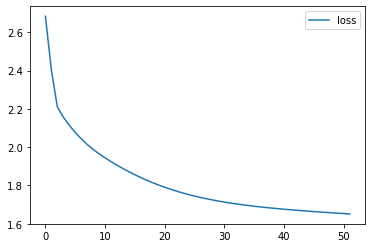

In [53]:
n_epochs = 50
total_str_len = text_matrix.shape[1]

for epoch in range(n_epochs):
    
    for i in range(0, total_str_len, str_len):
        opt.zero_grad()

        # The batch is formed at random
        batch_ix = text_matrix[:, i:i+str_len]
        batch_ix = torch.tensor(batch_ix, dtype=torch.int64)
        
        #print('({},{}),'.format(batch_ix.shape[0],batch_ix.shape[1]))
        logp_seq = rnn_loop(char_rnn, batch_ix)

        # compute loss
        predictions_logp = logp_seq[:, :-1]# YOUR CODE HERE
        actual_next_tokens = batch_ix[:, 1:] # YOUR CODE HERE

        loss = criterion(predictions_logp.contiguous().view(-1, num_tokens), 
                      actual_next_tokens.contiguous().view(-1))# YOUR CODE HERE

        # train with backprop
        # YOUR CODE HERE
        loss.backward()
        opt.step()

    history.append(loss.data.numpy())
    
    clear_output(True)
    plt.plot(history,label='loss')
    plt.legend()
    plt.show()

assert np.mean(history[:10]) > np.mean(history[-10:]), "RNN didn't converge."

In [54]:
len(history)

52

-----

### RNN: sampling

In [55]:
MAX_LENGTH = 500

In [56]:
def generate_sample(char_rnn, seed_phrase=' ', max_length=MAX_LENGTH, temperature=1.0):
    '''
    The function generates text given a phrase of length at least SEQ_LENGTH.
    :param seed_phrase: prefix characters. The RNN is asked to continue the phrase
    :param max_length: maximum output length, including seed_phrase
    :param temperature: coefficient for sampling.  higher temperature produces more chaotic outputs,
                        smaller temperature converges to the single most likely output
    '''
    
    x_sequence = [token_to_idx[token] for token in seed_phrase]
    x_sequence = torch.tensor([x_sequence], dtype=torch.int64)
    hid_state = char_rnn.initial_state(batch_size=1)
    
    #feed the seed phrase, if any
    for i in range(len(seed_phrase) - 1):
        hid_state, _ = char_rnn(x_sequence[:, i], hid_state)
    
    #start generating
    for _ in range(max_length - len(seed_phrase)):
        hid_state, logits = char_rnn(x_sequence[:, -1], hid_state)
        p_next = F.softmax(logits / temperature, dim=-1).data.numpy()[0]
        
        # sample next token and push it back into x_sequence
        next_ix = np.random.choice(num_tokens,p=p_next)
        next_ix = torch.tensor([[next_ix]], dtype=torch.int64)
        x_sequence = torch.cat([x_sequence, next_ix], dim=1)
    
    poem = ''.join([idx_to_token[ix] for ix in x_sequence.data.numpy()[0]])
    print(poem)
    #return ''.join([idx_to_token[ix] for ix in x_sequence.data.numpy()[0]])
    #return ''.join([tokens[ix] for ix in x_sequence.data.numpy()[0]])

In [59]:
generate_sample(char_rnn)

 sake of to to thee;
     it this ank betilv soos forth thes'd brang when by tokn,
  to lack i foughts'd weep acy?
  now ad heavun the loos have thine ear tutomes of the of my some my prelinst to mintes of gide nom stall irank thee, or poother-cay cail,
  then thou true evel coople of allgs thy to hime riautey magre sill sherel bysait how truar stene:
  evart you hood und give?
  do corut i haft frante rotigule lo.
  thun intien of your erss bread,
  i shel plave,
  when to the with this show, t


## ======

Plot the loss function (axis X: number of epochs, axis Y: loss function).

In [60]:
# An example of generated text.
# print(generate_text(length=500, temperature=0.2))

### More poetic model

Let's use LSTM instead of vanilla RNN and compare the results.

Plot the loss function of the number of epochs. Does the final loss become better?

In [154]:
# Your beautiful code here

In [160]:
class CharRNNLoop(nn.Module):
    def __init__(self, num_tokens=len(tokens), embedding_size=encode_size, rnn_num_units=64):
        super(self.__class__, self).__init__()
        self.num_tokens = num_tokens
        self.embedding_size = embedding_size
        self.num_units = rnn_num_units
        self.rnn = nn.LSTM(self.embedding_size, self.num_units, batch_first=True)
        self.hid_to_logits = nn.Linear(self.num_units, self.num_tokens)
        
    def forward(self, x, prev_state):
        assert isinstance(x.data, torch.LongTensor)
        output, state = self.rnn(F.one_hot(x, 38).float(), prev_state)
        next_logits = self.hid_to_logits(output)
        next_logp = F.log_softmax(next_logits, dim=-1)
        return next_logp, state
    
    def initial_state(self, batch_size):
        h = torch.zeros(1, batch_size, self.num_units, requires_grad=True)
        c = torch.zeros(1, batch_size, self.num_units, requires_grad=True)
        return (h, c)

In [161]:
model = CharRNNLoop()
opt = torch.optim.Adam(model.parameters())
history = []

# the model applies over the whole sequence
#batch_ix = to_matrix(sample(names, 32), max_len=MAX_LENGTH)
#batch_ix = torch.LongTensor(batch_ix)

In [162]:
batch_size

10

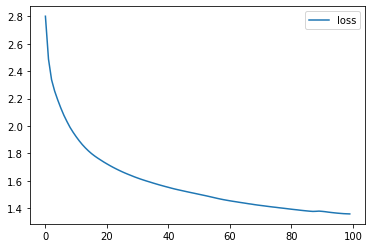

In [163]:
n_epochs = 100
total_str_len = text_matrix.shape[1]

for epoch in range(n_epochs):
    
    hidden_state, c_state = model.initial_state(batch_size)
    
    for i in range(0, total_str_len, str_len):
        opt.zero_grad()

        # The batch is formed at random
        batch_ix = text_matrix[:, i:i+str_len]
        batch_ix = torch.tensor(batch_ix, dtype=torch.int64)
        
        #print('({},{}),'.format(batch_ix.shape[0],batch_ix.shape[1]))
        logp_seq, (hidden_state, c_state) = model(batch_ix, (hidden_state, c_state))

        # compute loss
        predictions_logp = logp_seq[:, :-1]# YOUR CODE HERE
        actual_next_tokens = batch_ix[:, 1:] # YOUR CODE HERE

        loss = criterion(predictions_logp.contiguous().view(-1, num_tokens), 
                      actual_next_tokens.contiguous().view(-1))# YOUR CODE HERE
        
        hidden_state = hidden_state.detach()
        c_state = c_state.detach()
        
        # train with backprop
        # YOUR CODE HERE
        loss.backward()
        opt.step()

    history.append(loss.data.numpy())
    clear_output(True)
    plt.plot(history,label='loss')
    plt.legend()
    plt.show()

assert np.mean(history[:10]) > np.mean(history[-10:]), "RNN didn't converge."

Generate text using the trained net with different `temperature` parameter: `[0.1, 0.2, 0.5, 1.0, 2.0]`.

Evaluate the results visually, try to interpret them.

In [164]:
# Text generation with different temperature values here

In [165]:
MAX_LENGTH = 500

In [166]:
def generate_sample2(model, seed_phrase=' ', max_length=MAX_LENGTH, temperature=1.0):
    '''
    The function generates text given a phrase of length at least SEQ_LENGTH.
    :param seed_phrase: prefix characters. The RNN is asked to continue the phrase
    :param max_length: maximum output length, including seed_phrase
    :param temperature: coefficient for sampling.  higher temperature produces more chaotic outputs,
                        smaller temperature converges to the single most likely output
    '''
    
    x_sequence = [token_to_idx[token] for token in seed_phrase]
    x_sequence = torch.tensor([x_sequence], dtype=torch.int64)
    hidden_state, c_state = model.initial_state(batch_size=1)
    
    #feed the seed phrase, if any
    for i in range(len(seed_phrase) - 1):
        _, (hidden_state, c_state) = model(x_sequence[:, i], (hidden_state, c_state))
        hidden_state.detach()
        c_state.detach()
        
    
    #start generating
    next_ix = x_sequence[:, -1].unsqueeze(0)
    for _ in range(max_length - len(seed_phrase)):
        output, (hidden_state, c_state) = model(next_ix, (hidden_state, c_state))
        
        hidden_state.detach()
        c_state.detach()
        
        # sample next token and push it back into x_sequence
        next_ix = np.random.choice(num_tokens,p=np.exp(output.detach().numpy()[0][0]))
        next_ix = torch.tensor([[next_ix]], dtype=torch.int64)
        x_sequence = torch.cat([x_sequence, next_ix], dim=1)
    
    poem = ''.join([idx_to_token[ix] for ix in x_sequence.data.numpy()[0]])
    print(poem)
    #return ''.join([idx_to_token[ix] for ix in x_sequence.data.numpy()[0]])
    #return ''.join([tokens[ix] for ix in x_sequence.data.numpy()[0]])

In [168]:
for temperature in [0.1, 0.2, 0.5, 1.0, 2.0]:
    print('***Example with temperature = {}***'.format(temperature))
    print('************************************'.format(temperature))
    generate_sample2(model, temperature=temperature)
    print('\n')

***Example with temperature = 0.1***
************************************
 he for my spird, mays id which ride.
    if tous are with pectite in my mine imy lose,
  if thy greath a be blanzeny more him thing?
    but when thy bearnepare's fame in you may,
  the partizique in a precudous know,
  i loves every thou art who
  to glows; be writ? tond thy try fair regus'd
  the catlefon the uther, and straugnd may,
  'tis thr ugentuces the fair a despite 'rugh,
  what heart thun say is eyes tells to i prove,
  for thy not to alpouchtet in hise towe
  from since the ither be


***Example with temperature = 0.2***
************************************
 stalls of friled of ellly?
  be i returing, before-all effeetredsy to morb,
    aging i were of the knows to sleen love drowing,,
    and to spetture subject me belupt me contest,
  and sweet, waken to i ploral stide owne,
  if shave thee, that i my alone in deepseack;
  spear'd the best a will in all think't aging,
  of lest with sountow elast a

### Saving and loading models

Save the model to the disk, then load it and generate text. Examples are available [here](https://pytorch.org/tutorials/beginner/saving_loading_models.html]).

In [ ]:
# Saving and loading code here

### References
1. <a href='http://karpathy.github.io/2015/05/21/rnn-effectiveness/'> Andrew Karpathy blog post about RNN. </a> 
There are several examples of genration: Shakespeare texts, Latex formulas, Linux Sourse Code and children names.
2. <a href='https://github.com/karpathy/char-rnn'> Repo with char-rnn code </a>
3. Cool repo with PyTorch examples: [link](https://github.com/spro/practical-pytorch`)